In [51]:
from myqrsteps_skeleton import myqrsteps
import numpy as np
import matplotlib.pyplot as plt

# Load the sphinxmoth data
data = np.loadtxt('sphinxmoth.txt')
W = data[:, 0]  # Live weight in grams
R = data[:, 1]  # Oxygen consumption in milliliters/hour

# Transform the data for logarithmic linear least squares
log_W = np.log(W)
log_R = np.log(R)

In [52]:
A = np.vstack([log_W, np.ones_like(log_W)]).T
b = log_R

In [53]:
# Check the shapes of log_W and np.ones_like(log_W)
print("Shape of log_W:", log_W.shape)
print("Shape of ones:", np.ones_like(log_W).shape)

# Recreate the design matrix A and inspect it
A = np.vstack([log_W, np.ones_like(log_W)]).T
print("Shape of design matrix A:", A.shape)
print("Design matrix A:")
print(A)


Shape of log_W: (37,)
Shape of ones: (37,)
Shape of design matrix A: (37, 2)
Design matrix A:
[[-4.07454193e+00  1.00000000e+00]
 [-2.44184716e+00  1.00000000e+00]
 [-1.74869998e+00  1.00000000e+00]
 [ 1.04360015e-01  1.00000000e+00]
 [ 5.53885113e-01  1.00000000e+00]
 [ 1.40854497e+00  1.00000000e+00]
 [ 1.69561561e+00  1.00000000e+00]
 [ 1.78507048e+00  1.00000000e+00]
 [-3.68887945e+00  1.00000000e+00]
 [-2.19822508e+00  1.00000000e+00]
 [-1.55589715e+00  1.00000000e+00]
 [-1.00050033e-03  1.00000000e+00]
 [ 1.10525683e+00  1.00000000e+00]
 [ 1.45395301e+00  1.00000000e+00]
 [ 1.52169900e+00  1.00000000e+00]
 [ 1.54329811e+00  1.00000000e+00]
 [-3.91202301e+00  1.00000000e+00]
 [-2.46510402e+00  1.00000000e+00]
 [-1.76609172e+00  1.00000000e+00]
 [ 2.54642218e-01  1.00000000e+00]
 [ 1.11185752e+00  1.00000000e+00]
 [ 1.45628673e+00  1.00000000e+00]
 [ 1.66770682e+00  1.00000000e+00]
 [-3.91202301e+00  1.00000000e+00]
 [-2.12863179e+00  1.00000000e+00]
 [-1.56064775e+00  1.00000000e+

In [54]:
# Perform QR decomposition using your myqrsteps function
Q, R = myqrsteps(A)

# Check shapes of Q and R to ensure they are appropriate
print("Shape of Q:", Q.shape)
print("Shape of R:", R.shape)

# Compute Q.T @ log_R
Q_T_b = Q.T @ b  # This should result in a (2,) shaped vector after multiplication

# Truncate R to a square matrix
R_truncated = R[:2, :2]  # Only the first two rows and columns (since we have two parameters)

# Solve the system R * x = Q_T_b for the coefficients
coeffs = np.linalg.solve(R_truncated, Q_T_b[:2])

# Extract the coefficients a and log_b
a = coeffs[0]
log_b = coeffs[1]
b_val = np.exp(log_b)

# Output the results
print("Exponent a:", a)
print("Intercept b (log_b transformed):", b_val)



Shape of Q: (37, 37)
Shape of R: (37, 2)
Exponent a: 0.5762265209898021
Intercept b (log_b transformed): 1.3047175628513263


In [55]:
predicted_R = b_val * W**a

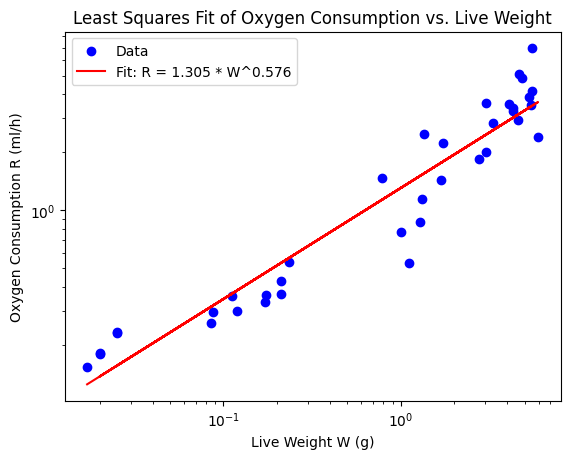

In [79]:

plt.scatter(W, data[:,1], label="Data", color='blue')
plt.plot(W, predicted_R, label=f"Fit: R = {b_val:.3f} * W^{a:.3f}", color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Live Weight W (g)")
plt.ylabel("Oxygen Consumption R (ml/h)")
plt.legend()
plt.title("Least Squares Fit of Oxygen Consumption vs. Live Weight")
plt.show()
